In [395]:
import numpy as np
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 1000000)
pd.set_option('display.max_rows', 1000000)




In [396]:
data = pd.read_table('Fsatellites.tsv', encoding = "ISO-8859-1")
print(data.shape)

for col in data.columns:
    if 'Unnamed' in col:
        del data[col]
        
for col in data.columns:
    if 'Source' in col:
        del data[col]

#data = data.fillna(data.min())
#pd.unique()
#data['Expected Lifetime']

(1381, 254)


In [397]:
data.columns.values

array(['Name of Satellite, Alternate Names', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'], dtype=object)

In [398]:
data.columns=['name', 'country_reg', 'country', 'owner', 'users',
              'purpose', 'description', 'CLO', 'TOO', 'longitude',
              'perigee_km', 'apogee_km', 'eccentricity', 'inclination', 
              'period_minutes', 'launch_mass', 'dry_mass', 'power_watts',
              'launch_date', 'expected_lifetime_years', 'contractor', 
              'contractor_country', 'launch_site', 'launch_vehicle',
              'COSPAR', 'NORAD', 'comments']
#int(data['power'].replace(',', ''))
#data['power'].replace(',', '').convert_objects(convert_numeric=True,)
#data['power']


In [399]:
data['CLO'] = data['CLO'].replace('LEO ', 'LEO')

In [400]:
data_NoC = data.replace(to_replace=',', value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="(yrs\.|yr\.|hrs\.|trs)", value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="\.?[0-9]*-", value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="\+", value='', regex=True)
pd.unique(data_NoC['expected_lifetime_years'])

array([nan, '15 ', '12 ', '14 ', '2 ', '3 ', '1 ', '5 ', '10 ', '14', '8 ',
       '7 ', '1.5 ', '13 ', '6 ', '.5 ', '9 ', '18 ', '16 ', '.25 ', '11 ',
       '15  ', '17 ', '30 ', '14.5 ', '7.25 ', ' 3 ', '4 ', '11.5 ',
       '7.5 ', '2.5 ', '12.6 '], dtype=object)

In [401]:

data['expected_lifetime_years'].isnull().sum()

428

In [402]:
data_NoC['expected_lifetime_years'].isnull().sum()

428

In [403]:
data_converted = data_NoC.convert_objects(convert_dates=True, convert_numeric=True,)
data = data_converted
#data

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,perigee_km,apogee_km,eccentricity,inclination,period_minutes,launch_mass,dry_mass,power_watts,launch_date,expected_lifetime_years,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments
0,AAUSat-5 (Aalborg University Cubesat 5),NR (12/15),Denmark,Aalborg University,Civil,Communications,Automatic Identification System (AIS),LEO,Non-Polar Inclined,0.00,395,409,0.001030,51.64,92.60,1,NaN,NaN,10/2/2015,NaN,Aalborg University,Denmark,International Space Station,Nanorack Deployer,1998-067GZ,40948,Main goal is to test a AIS receiver built by s...
1,ABS-2 (Koreasat-8 ST-3),NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000.00,2/6/2014,15.00,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,32 C-band 51 Ku-band and 6 Ka-band transponder...
2,ABS-3 (Agila 2 Mabuhay 1),Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000.00,8/19/1997,15.00,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901,Most powerful telecommunications satellite in ...
3,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,35788,35803,0.000178,0.10,1436.00,2000,NaN,NaN,3/2/2015,15.00,Boeing Satellite Systems,NaN,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.
4,ABS-4 (ABS-2i MBSat Mobile Broadcasting Satell...,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35780,35793,0.000154,0.01,1436.10,4143,1700,7400.00,3/13/2004,12.00,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.
5,ABS-6 (ABS-1 LMI-1 Lockheed Martin-Intersputni...,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,159.00,35777,35794,0.000202,0.01,1436.08,2894,1730,NaN,9/26/1999,15.00,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924,28 C-band 16 Ku-band; business services public...
6,ABS-7 (Koreasat 3 Mugungwha 3),South Korea,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,116.18,35780,35791,0.000130,0.01,1436.06,3500,1800,4800.00,9/4/1999,15.00,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894,30 Ku-band 6 Ka-band; Korean peninsula the Jap...
7,Advanced Orion 2 (NROL 6 USA 139),USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,35560,36013,0.005370,7.72,1436.14,4500,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336,ELINT.
8,Advanced Orion 3 (NROL 19 USA 171),USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,35589,35984,0.004680,3.20,1436.10,4500,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937,Electronic intelligence (ELINT).
9,Advanced Orion 4 (NRO L-26 USA 202),USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,44.00,35714,35937,0.002640,2.89,1438.80,5000,NaN,NaN,1/18/2009,NaN,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2009-001A,33490,ELINT.


In [404]:
data['launch_date'] = pd.to_datetime(data['launch_date'])

In [405]:
data['expected_lifetime_years'].isnull().sum()

428

In [406]:
pd.unique(data.expected_lifetime_years)

array([   nan,  15.  ,  12.  ,  14.  ,   2.  ,   3.  ,   1.  ,   5.  ,
        10.  ,   8.  ,   7.  ,   1.5 ,  13.  ,   6.  ,   0.5 ,   9.  ,
        18.  ,  16.  ,   0.25,  11.  ,  17.  ,  30.  ,  14.5 ,   7.25,
         4.  ,  11.5 ,   7.5 ,   2.5 ,  12.6 ])

In [407]:
datatypes = data.columns.to_series().groupby(data.dtypes).groups
datatypes

{dtype('int64'): ['perigee_km', 'apogee_km', 'NORAD'],
 dtype('float64'): ['longitude',
  'eccentricity',
  'inclination',
  'period_minutes',
  'launch_mass',
  'dry_mass',
  'power_watts',
  'expected_lifetime_years'],
 dtype('<M8[ns]'): ['launch_date'],
 dtype('O'): ['name',
  'country_reg',
  'country',
  'owner',
  'users',
  'purpose',
  'description',
  'CLO',
  'TOO',
  'contractor',
  'contractor_country',
  'launch_site',
  'launch_vehicle',
  'COSPAR',
  'comments']}

In [408]:
data['launch_year'], data['launch_month'], data['launch_day'] = data['launch_date'].dt.year, data['launch_date'].dt.month, data['launch_date'].dt.day
#data.launch_date.sort(inplace=False)
data.head()



,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,perigee_km,apogee_km,eccentricity,inclination,period_minutes,launch_mass,dry_mass,power_watts,launch_date,expected_lifetime_years,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments,launch_year,launch_month,launch_day
0,AAUSat-5 (Aalborg University Cubesat 5),NR (12/15),Denmark,Aalborg University,Civil,Communications,Automatic Identification System (AIS),LEO,Non-Polar Inclined,0.00,395,409,0.001030,51.64,92.60,1,NaN,NaN,2015-10-02,NaN,Aalborg University,Denmark,International Space Station,Nanorack Deployer,1998-067GZ,40948,Main goal is to test a AIS receiver built by s...,2015,10,2
1,ABS-2 (Koreasat-8 ST-3),NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000,2014-02-06,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,32 C-band 51 Ku-band and 6 Ka-band transponder...,2014,2,6
2,ABS-3 (Agila 2 Mabuhay 1),Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000,1997-08-19,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901,Most powerful telecommunications satellite in ...,1997,8,19
3,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,35788,35803,0.000178,0.10,1436.00,2000,NaN,NaN,2015-03-02,15,Boeing Satellite Systems,NaN,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.,2015,3,2
4,ABS-4 (ABS-2i MBSat Mobile Broadcasting Satell...,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35780,35793,0.000154,0.01,1436.10,4143,1700,7400,2004-03-13,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.,2004,3,13


In [409]:
data['nickname'] = data['name'].str.extract('(\(.*\))')
data['name'] = data['name'].replace(to_replace="\(.*\)", value='', regex=True)

#data

In [410]:
data['longitude'][data['longitude'] > 180] = data['longitude'] - 360


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [411]:
#data[609:]

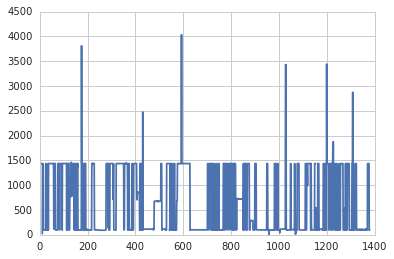

In [412]:
plt.plot(data['period_minutes'])




In [413]:
data['period_minutes'].mean()

643.1505886627888

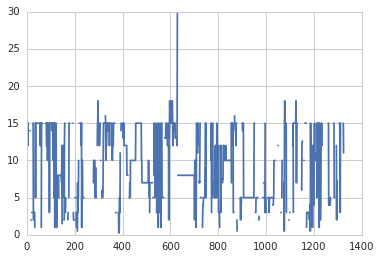

In [414]:
plt.plot(data['expected_lifetime_years'])



In [415]:
data['expected_lifetime_years'].mean()

9.530115424973769

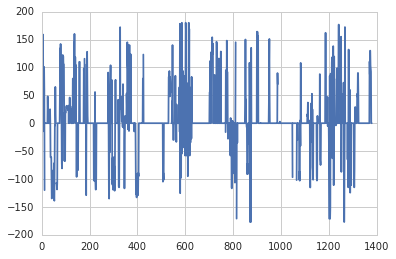

In [416]:
plt.plot(data['longitude'])



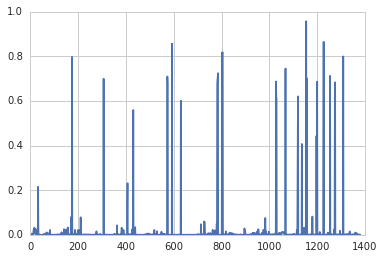

In [417]:
plt.plot(data['eccentricity'])



In [418]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [419]:
#LEO_other.TOO.value_counts()

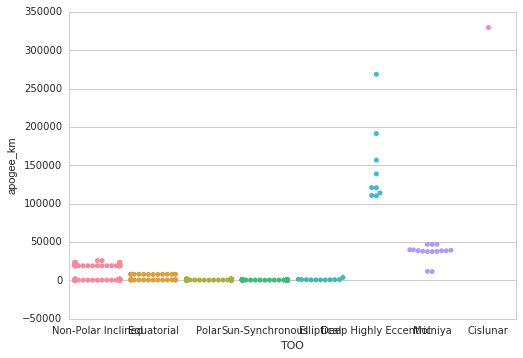

In [420]:
sns.swarmplot(x="TOO", y="apogee_km", data=data);

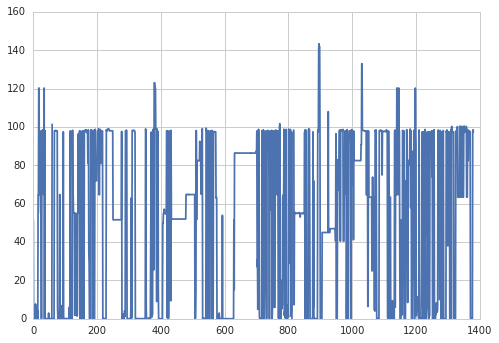

In [421]:
#plt.plot(data['power'])
plt.plot(data['inclination'])


In [422]:
data['inclination'].mean()

50.00025436046514

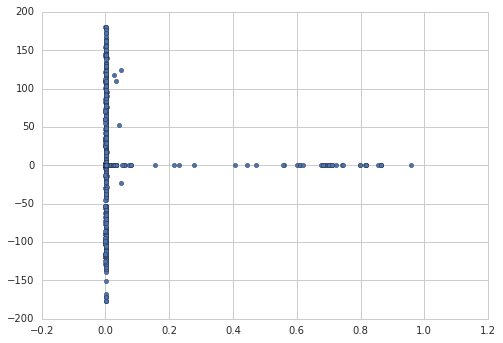

In [423]:
plt.scatter(data['eccentricity'], data['longitude'])



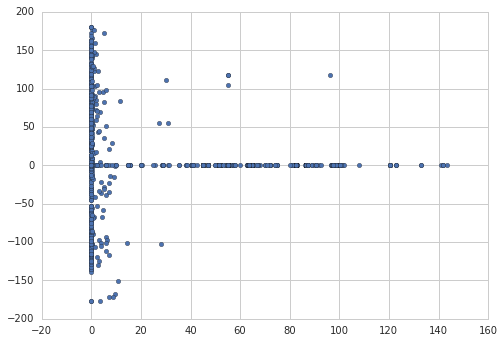

In [424]:
plt.scatter(data['inclination'], data['longitude'])

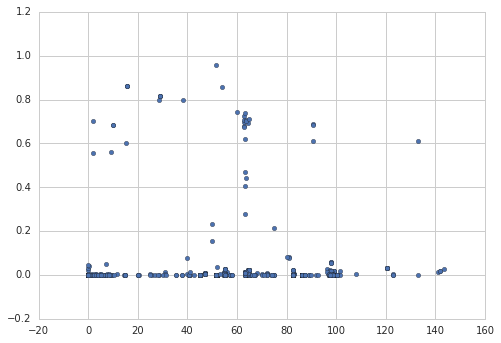

In [425]:
plt.scatter(data['inclination'], data['eccentricity'])

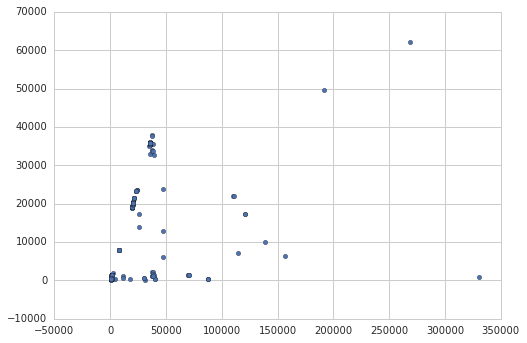

In [426]:
plt.scatter(data['apogee_km'], data['perigee_km'])

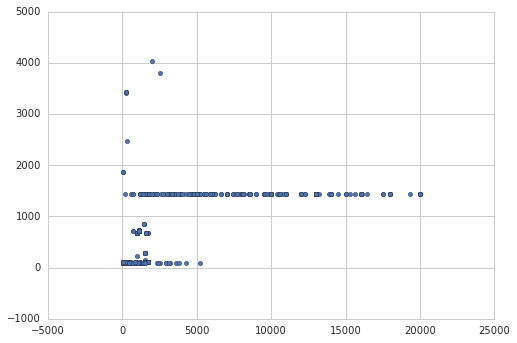

In [427]:
plt.scatter(data['power_watts'], data['period_minutes'])

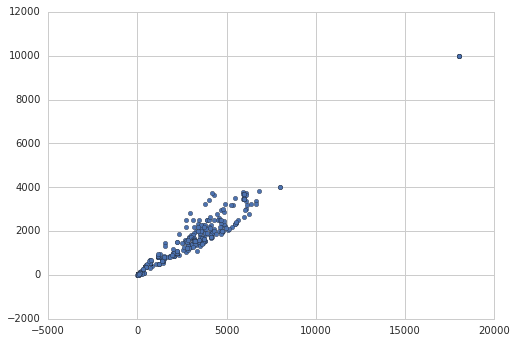

In [428]:
plt.scatter(data['launch_mass'], data['dry_mass'])

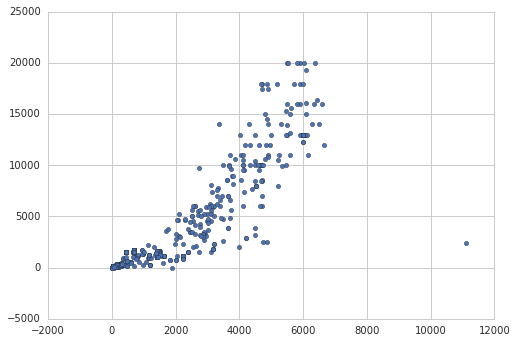

In [429]:
plt.scatter(data['launch_mass'], data['power_watts'])

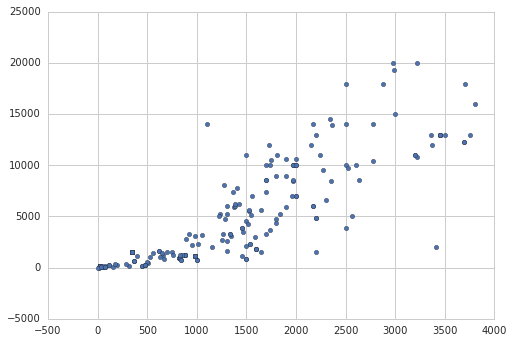

In [430]:
plt.scatter(data['dry_mass'], data['power_watts'])

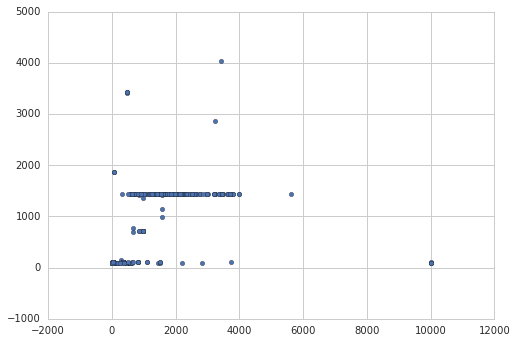

In [431]:
plt.scatter(data['dry_mass'], data['period_minutes'])

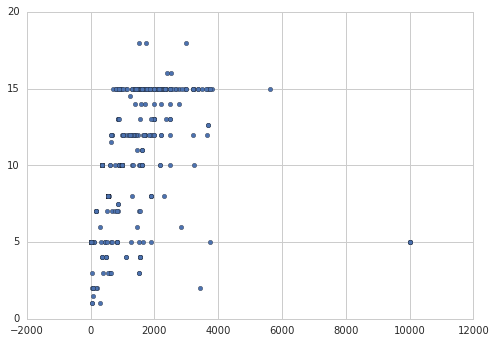

In [432]:
plt.scatter(data['dry_mass'], data['expected_lifetime_years'])

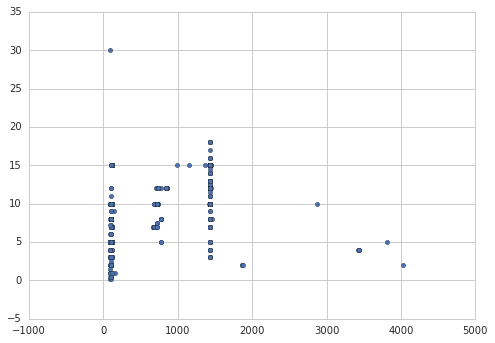

In [433]:
plt.scatter(data['period_minutes'], data['expected_lifetime_years'])

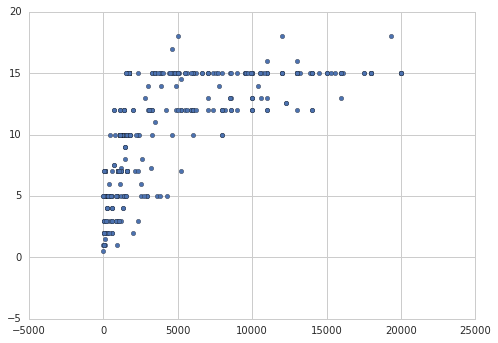

In [434]:
plt.scatter(data['power_watts'], data['expected_lifetime_years'])

In [435]:
data.to_csv('CSatellites.csv')

In [436]:
pd.unique(data['CLO'])

array(['LEO', 'GEO', 'MEO', 'Elliptical'], dtype=object)

In [437]:
data['CLO'].value_counts()

LEO           759
GEO           493
MEO            92
Elliptical     37
Name: CLO, dtype: int64

In [438]:
LEO = data[data.CLO.isin(["LEO"])]
GEO = data[data.CLO.isin(["GEO"])]
MEO_Elliptical = data[data.CLO.isin(["MEO", "Elliptical"])]
cis = data[data.TOO.isin(["Cislunar"])]
frames = [MEO_Elliptical, cis]
MEO_Elliptical = pd.concat(frames)




In [439]:
MEO_Elliptical.TOO.value_counts()

Non-Polar Inclined       80
Molniya                  15
Equatorial               12
Deep Highly Eccentric     9
Cislunar                  1
Name: TOO, dtype: int64

In [440]:
LEO_sun = LEO[LEO.TOO.isin(["Sun-Synchronous"])]

In [441]:
LEO_other = LEO[LEO.TOO.isin(["Non-Polar Inclined", "Polar", "Equatorial", "Elliptical"])]


In [442]:
LEO_other.TOO.value_counts()

Non-Polar Inclined    230
Polar                 156
Equatorial             16
Elliptical             11
Name: TOO, dtype: int64

In [443]:
LEO_sun.to_csv("LEO_sun.csv")
LEO_other.to_csv("LEO_other.csv")
GEO.to_csv("GEO.csv")
MEO_Elliptical.to_csv("MEO_Elliptical.csv")



In [444]:
min(pd.unique(GEO.inclination))
max(pd.unique(GEO.inclination))
# pd.unique(GEO.longitude)
#LEO.apogee_km.value_counts()

96.400000000000006

In [445]:
#LEO

In [446]:
#GEO

In [447]:
#MEO_Elliptical

In [448]:
pd.unique(data['TOO'])

array(['Non-Polar Inclined', nan, 'Equatorial', 'Polar', 'Sun-Synchronous',
       'Elliptical', 'Deep Highly Eccentric', 'Molniya', 'Cislunar'], dtype=object)

In [449]:
data['TOO'].value_counts()

Sun-Synchronous          345
Non-Polar Inclined       310
Polar                    156
Equatorial                28
Molniya                   15
Elliptical                11
Deep Highly Eccentric      9
Cislunar                   1
Name: TOO, dtype: int64

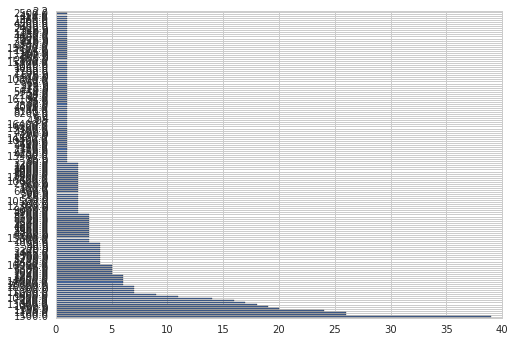

In [450]:
power = data['power_watts'].value_counts()
power.plot(kind='barh', rot=0)

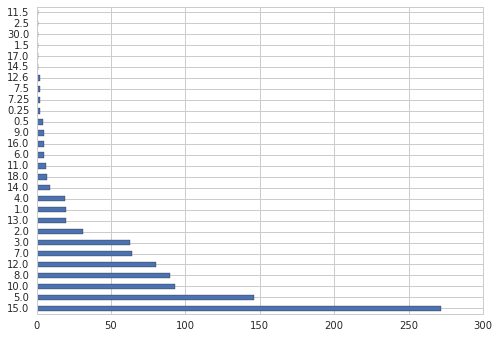

In [451]:
#pd.unique(data['longitude'])
data.expected_lifetime_years.value_counts().plot(kind='barh', rot=0)

In [452]:
#pd.unique(data['inclination'])
#data['inclination'].value_counts(sort=True)


In [453]:

#data['inclination'].max()
max(data.apogee_km)

330000

In [454]:
max(data.perigee_km)

62200

In [455]:
min(data.apogee_km)

322

In [456]:
min(data.perigee_km)

200

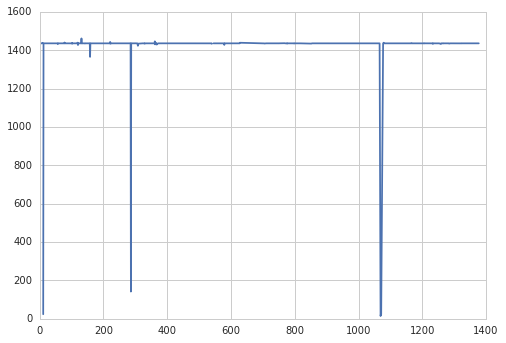

In [457]:
plt.plot(GEO.period_minutes)

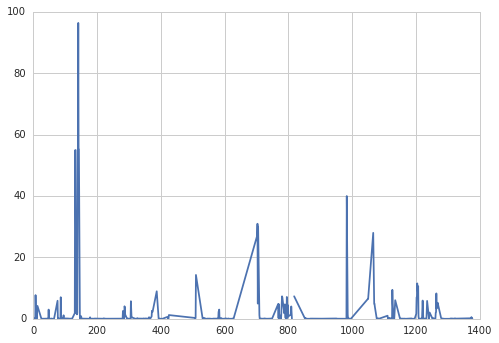

In [458]:
plt.plot(GEO.inclination)

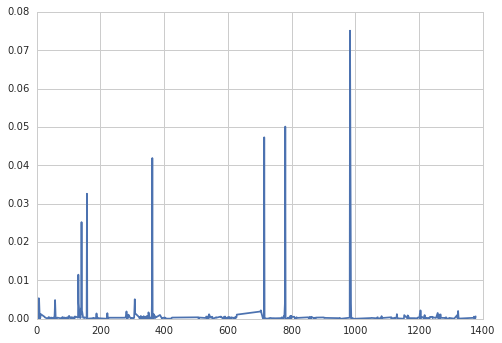

In [459]:
plt.plot(GEO.eccentricity)

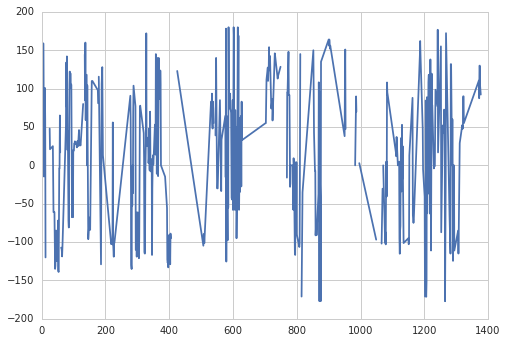

In [460]:
plt.plot(GEO.longitude)

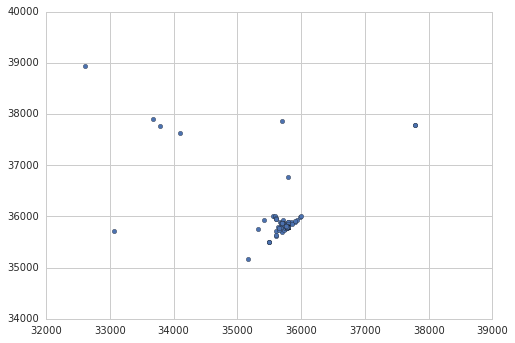

In [461]:
plt.scatter(GEO.perigee_km, GEO.apogee_km)

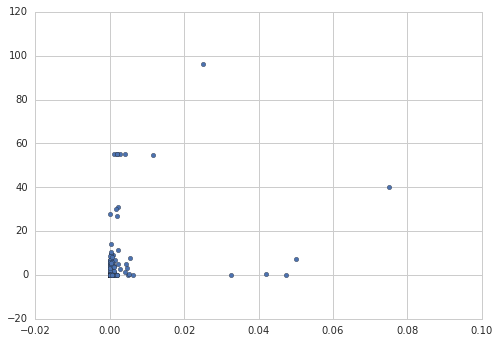

In [462]:
plt.scatter(GEO.eccentricity, GEO.inclination)

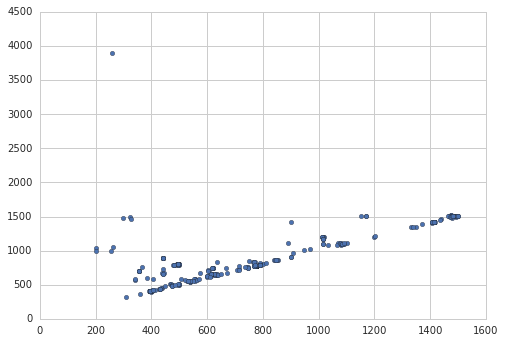

In [463]:
plt.scatter(LEO_other.perigee_km, LEO_other.apogee_km)

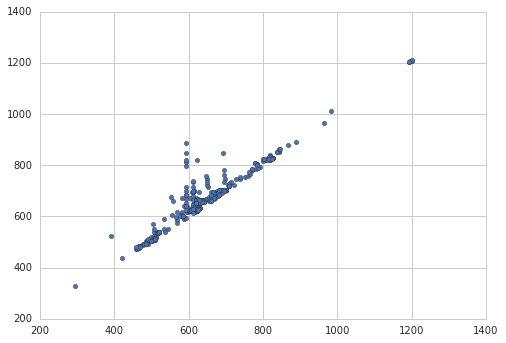

In [464]:
plt.scatter(LEO_sun.perigee_km, LEO_sun.apogee_km)

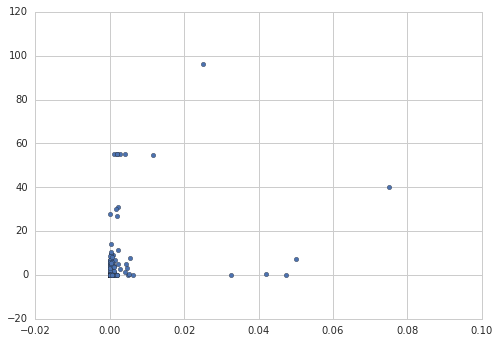

In [465]:
plt.scatter(GEO.eccentricity, GEO.inclination)

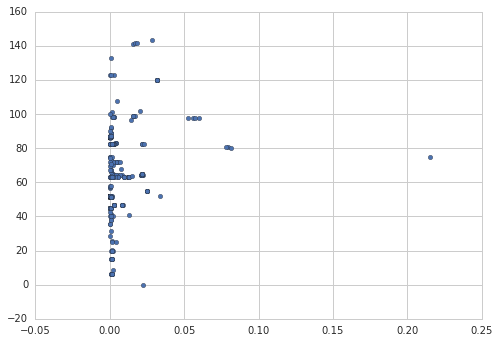

In [466]:
plt.scatter(LEO_other.eccentricity, LEO_other.inclination)

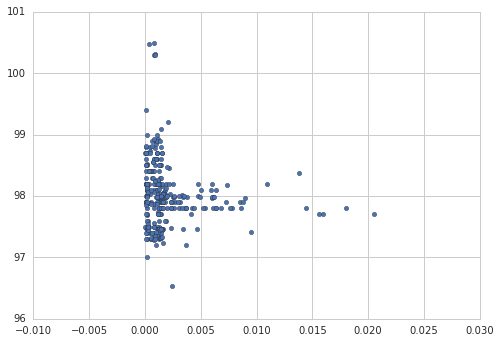

In [467]:
plt.scatter(LEO_sun.eccentricity, LEO_sun.inclination)

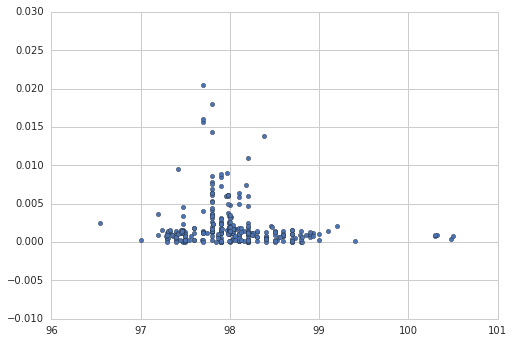

In [468]:
plt.scatter(LEO_sun.inclination, LEO_sun.eccentricity)

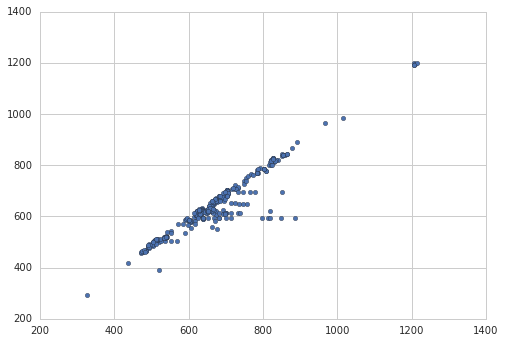

In [469]:
plt.scatter(LEO_sun.apogee_km, LEO_sun.perigee_km)

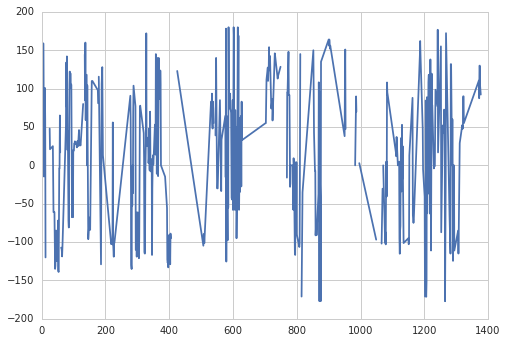

In [470]:
plt.plot(GEO.longitude)

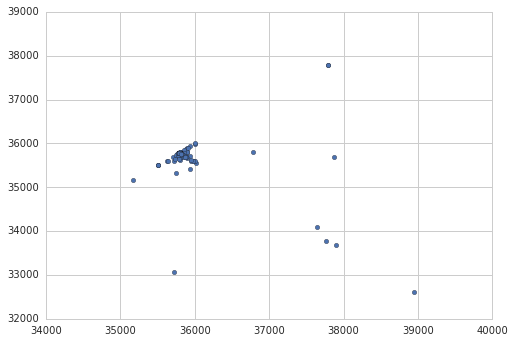

In [471]:
plt.scatter(GEO.apogee_km, GEO.perigee_km)

In [472]:
GEO.longitude.max()

180.0